# APA Laboratori 3 - Clustering 

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --upgrade 
# !pip install numpy --upgrade
# !pip install scipy --upgrade
# !pip install statsmodels --upgrade
# !pip install scikit-learn --upgrade
%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('precision', 3)
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Extra imports
from numpy.random import  uniform,normal
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score
from numpy.random import multivariate_normal
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture


In [4]:
np.random.seed(7)

## Example 1. Clustering easy artificial 2D data with k-means

First we create a simple data set:


In [5]:
N1 = 30
N2 = 40
N3 = 50

create cluster 1

In [6]:
x1 = normal (1,0.5,N1)
y1 = normal (1,0.5,N1)

 create cluster 2

In [7]:
x2 = normal (2,0.5,N2)
y2 = normal (6,0.7,N2)

create cluster 3

In [8]:
x3 = normal (7,1,N3)
y3 = normal (7,1,N3)

create the data

In [9]:
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
c = np.array([0] * N1 + [1] * N2 + [2] *N3)
D = pd.DataFrame({'X1':x, 'Y1':y, 'C':c})

this is your data

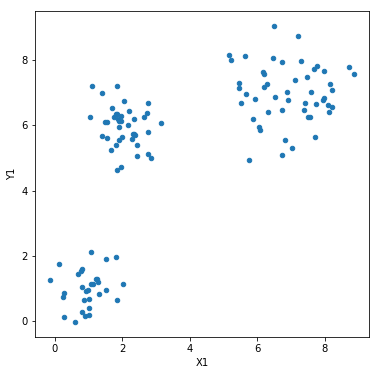

In [10]:
D.plot.scatter(x='X1', y='Y1',figsize=(6,6));

and these are the true clusters

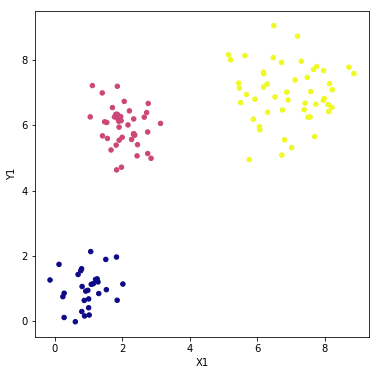

In [11]:
D.plot.scatter(x='X1', 
               y='Y1',
               c='C', 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

 so we have 3 very clean clusters ...

Let's execute k-means

In [12]:
K = 3 # yeah, this is tricky, why 3?

 execute k-means with a maximum of 100 iterations

In [13]:
kmeans_3 = KMeans(n_clusters=K,max_iter=100)
kmeans_3.fit(D.loc[:,['X1','Y1']]);

plot and paint the clusters (according to the computed assignments) and plot the cluster centers

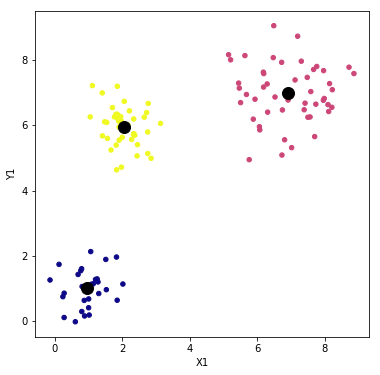

In [14]:
D.plot.scatter(x='X1', 
               y='Y1',
               c=kmeans_3.labels_, 
               colormap='plasma', 
               figsize=(6,6),
               colorbar=False)
plt.plot(kmeans_3.cluster_centers_[:,0], 
         kmeans_3.cluster_centers_[:,1], 
         'ko', markersize=12);

clustering quality as measured by the Calinski-Harabasz index (recommended)

This index measures the dispersion of the data points within the clusters (SSW) and between the clusters (SSB)

A good clustering has small SSW (compact clusters) and large SSB (separated cluster centers)

 There is also a correction for the number of clusters

The CH index is then:

 $CH = \frac{SSB/(K-1)}{SSW/(N-K)}$

 where $N$ is the number of data points and $K$ is the number of clusters

In [15]:
CH_3 = calinski_harabaz_score(D.loc[:,['X1','Y1']], 
                              kmeans_3.labels_ )
CH_3

728.0901256606564

now let's not be tricky ##

In [16]:
K = 5 # guess what is going to happen?

execute k-means with a maximum of 100 iterations

In [17]:
kmeans_5 = KMeans(n_clusters=K,max_iter=100)
kmeans_5.fit(D.loc[:,['X1','Y1']]);

plot and paint the clusters (according to the computed assignments), plot the cluster centers

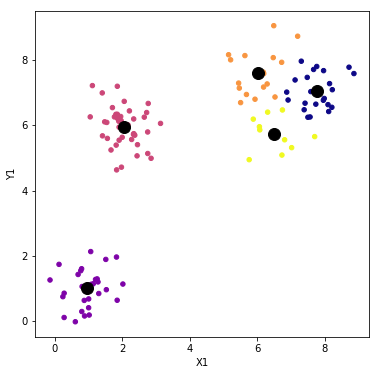

In [18]:
D.plot.scatter(x='X1', 
               y='Y1',
               c=kmeans_5.labels_, 
               colormap='plasma', 
               figsize=(6,6),
               colorbar=False)
plt.plot(kmeans_5.cluster_centers_[:,0], 
         kmeans_5.cluster_centers_[:,1], 
         'ko', markersize=12);

clustering quality as measured by the Calinski-Harabasz index

In [19]:
CH_5 = calinski_harabaz_score(D.loc[:,['X1','Y1']], 
                              kmeans_5.labels_)
CH_5

653.0660770798015

 notice CH.3 > CH.5, so K=3 is better according to C-H

***

## Example 2. Clustering not-so-easy artificial 2D data with k-means and E-M

In [20]:
np.random.seed(6)
K =5 
N=2000
center = np.array((0,0))
dispersion = 30

mu_k= multivariate_normal(center, np.eye(2)*dispersion,K)
pi_k = uniform(0.2,1.5,size=K)
data, labels = make_blobs(n_samples=N, 
                          n_features=2, 
                          centers=mu_k, 
                          cluster_std=pi_k)
# Rotate and scale
data = np.dot(data, np.array([[1,0.2],[0.6,1.8]])) 
# Rotate and scale
mu_k = np.dot(mu_k, np.array([[1,0.2],[0.6,1.8]])) 

data = np.vstack((data[labels==0][:400], 
                  data[labels==1][:300], 
                  data[labels==2][:125], 
                  data[labels==3][:100], 
                  data[labels==4][:75]))
labels=np.array([0]*400+[1]*300+[2]*125+[3]*100+[4]*75)
d = pd.DataFrame({'X1': data[:,0], 
                  'Y1':data[:,1], 
                  'labels':labels})

generate 2D data as a mixture of 5 Gaussians, The rotation makes the two variable non independent with different variances  the centers and coefficients of the mixture are chosen randomly

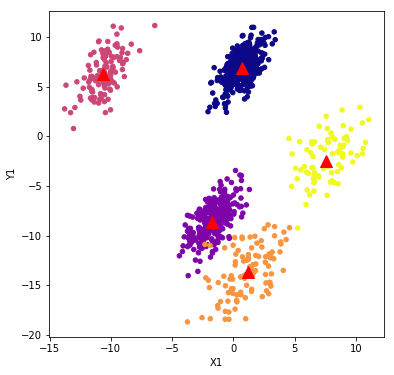

In [21]:
d.plot.scatter(x='X1', 
               y='Y1',
               c=labels, 
               colormap='plasma', 
               figsize=(6,6),
               colorbar=False)
plt.plot(mu_k[:,0], mu_k[:,1], 
         'r^', markersize=12);

may be we want to have a look at the unconditional density p(x)

 compute 2D kernel density
 
  this is the raw data (what the clustering method sees) and   a contour plot of the unconditional density 

/usr/lib64/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


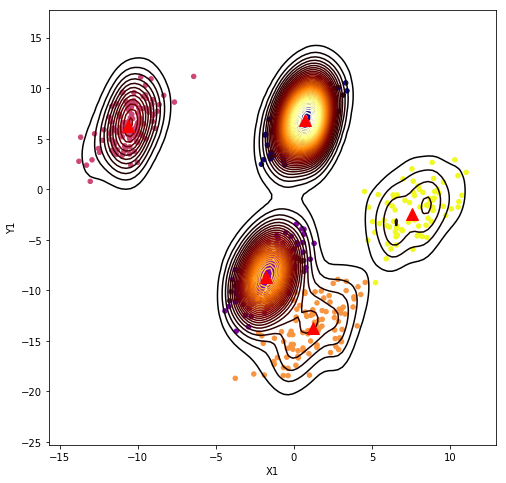

In [22]:
d.plot.scatter(x='X1', 
               y='Y1',
               c=labels, 
               colormap='plasma', 
               figsize=(8,8),colorbar=False)
plt.plot(mu_k[:,0], mu_k[:,1], 
         'r^', markersize=12);
sns.kdeplot(d.X1,d.Y1, 
            n_levels=50,cmap='afmhot');

a simpler way of plotting the data

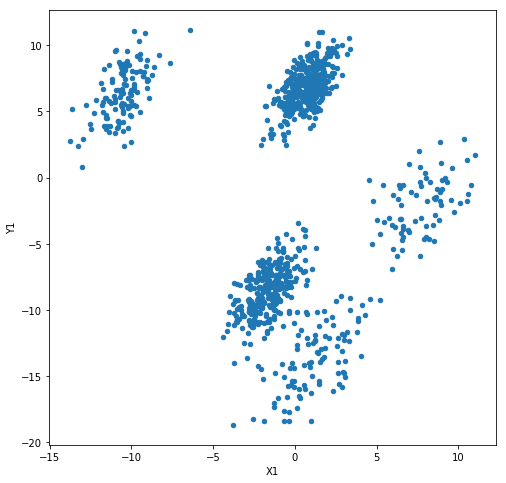

In [23]:
d.plot.scatter(x='X1', y='Y1', figsize=(8,8));

let us try first with k-means (K=2)

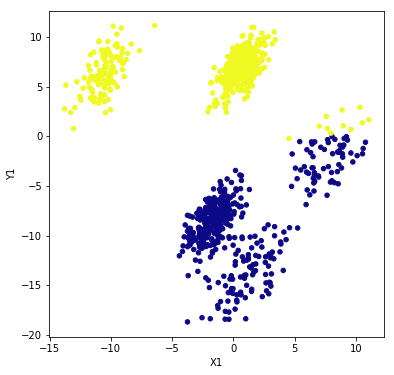

In [24]:
K=2

kmeans_2 = KMeans(n_clusters=K,max_iter=100)
kmeans_2.fit(d.loc[:,['X1','Y1']]);
d.plot.scatter(x='X1', y='Y1',
               c=kmeans_2.labels_, 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

Can we be indulgent with the result? we know the truth is there are 5 clusters,

Is this is a reasonable result if we ask for 2?

clustering quality as measured by the Calinski-Harabasz index

In [25]:
CH_2 = calinski_harabaz_score(d.loc[:,['X1','Y1']], 
                              kmeans_2.labels_)
CH_2

2210.1921650543345

 let us try now with k-means (K=5)

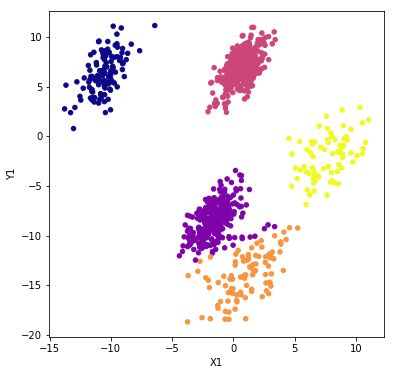

In [26]:
K=5

kmeans2_5 = KMeans(n_clusters=K,max_iter=100)
kmeans2_5.fit(d.loc[:,['X1','Y1']]);
d.plot.scatter(x='X1', y='Y1',
               c=kmeans2_5.labels_, 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

 This time the result has even more chances of being largely incorrect
because there are more ways of getting a wrong solution

clustering quality as measured by the Calinski-Harabasz index

In [27]:
CH2_5 = calinski_harabaz_score(d.loc[:,['X1','Y1']], 
                               kmeans2_5.labels_)
CH2_5

4511.6033865718355

 at least CH2.5 >> CH2.2 ... so C-H does a good job

In class we saw that k-means is usually re-run several times

In [28]:
kmeans2_5 = KMeans(n_clusters=K,max_iter=100,n_init=100)
kmeans2_5.fit(d.loc[:,['X1','Y1']])
CH2_5 = calinski_harabaz_score(d.loc[:,['X1','Y1']], 
                               kmeans2_5.labels_ )
CH2_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

4511.6033865718355

 so it is not a matter of wrong initialization
 this is really the best k-means can do here

 this may take a while

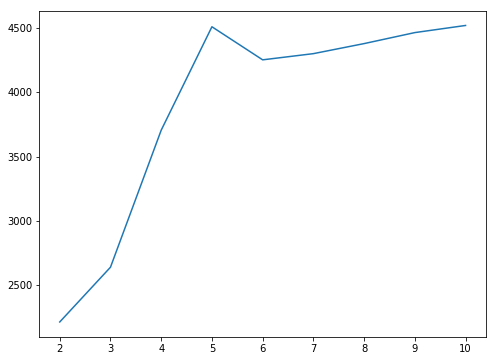

In [29]:
r = []
for i in range(2,11):
    km = KMeans(n_clusters=i,
                max_iter=100,
                n_init=100).fit(d.loc[:,['X1','Y1']])
    r.append(calinski_harabaz_score(d.loc[:,['X1','Y1']], 
                                    km.labels_ ))
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(range(2,11),r);

 the conclusion is that k-means + C-H bet for 5 clusters ... 
 not bad, not bad ...

 but the real *shape* of the clusters cannot be captured, because k-means only "sees" spherical clusters and these are ellipsoidal

 let us try now E-M

This method performs E-M for mixture densities, including mixtures of Gaussians
we can specify which family of gaussians we intend to fit:

* "full" each component has full covariance matrix, "diagonal" covariances are diagonal (just variance), 

*  "spherical"  each component has his own diagonal univariance and "tied" all components share variance

    WARNING: default is "full".

 suppose first that we know the truth and specify axis-aligned densities (i.e., independent variables)

In [30]:
gm =GaussianMixture(n_components=5, 
                    covariance_type='diag').fit(d.loc[:,['X1','Y1']])
print('BIC=', gm.bic(d.loc[:,['X1','Y1']]))
print('\nLOG Likelihood=', gm.lower_bound_)
print('\nWEIGHTS=')
pd.DataFrame(gm.weights_)
print('\nMEANS=')
pd.DataFrame(gm.means_)
print('\nCOV=')
pd.DataFrame(gm.covariances_)

BIC= 9962.697463368639

LOG Likelihood= -4.898688994806308

WEIGHTS=


,0
0,0.400
1,0.295
2,0.125
3,0.074
4,0.106



MEANS=


,0,1
0,0.692,6.890
1,-1.659,-8.483
2,-10.535,6.444
3,7.664,-2.046
4,0.854,-13.396



COV=


,0,1
0,0.898,2.310
1,1.126,2.819
2,1.249,4.071
3,2.490,4.672
4,4.031,7.404


 This is a graphical summary of the clustering

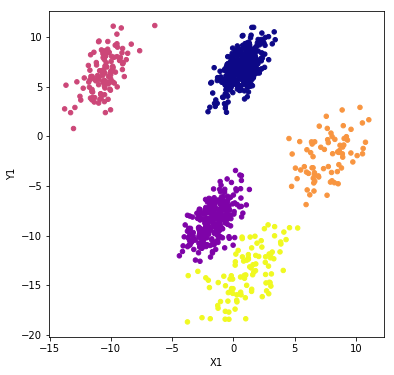

In [31]:
d.plot.scatter(x='X1', y='Y1',
               c=gm.predict(d.loc[:,['X1','Y1']]), 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

 it was very likely that E-M performed extremely well
 why? because we knew the truth (cluster form and number)

 suppose now we do not the know the truth but we still wish to fit general gaussians

In [32]:
gm =GaussianMixture(n_components=5, 
                    covariance_type='full').fit(d.loc[:,['X1','Y1']])
print('BIC=', gm.bic(d.loc[:,['X1','Y1']]))
print('\nLOG Likelihood=', gm.lower_bound_)
print('\nWEIGHTS=')
pd.DataFrame(gm.weights_)
print('\nMEANS=')
pd.DataFrame(gm.means_)
print('\nCOV=')
gm.covariances_

BIC= 9609.070993641648

LOG Likelihood= -4.704401604690396

WEIGHTS=


,0
0,0.125
1,0.303
2,0.400
3,0.098
4,0.074



MEANS=


,0,1
0,-10.535,6.444
1,-1.692,-8.528
2,0.692,6.890
3,1.186,-13.669
4,7.667,-2.039



COV=


array([[[1.24862465, 1.29165545],
        [1.29165545, 4.07145078]],

       [[1.13364653, 1.07469376],
        [1.07469376, 3.01171371]],

       [[0.8979744 , 0.84783988],
        [0.84783988, 2.30951699]],

       [[3.11324278, 2.83240408],
        [2.83240408, 6.49679973]],

       [[2.49337285, 1.55130335],
        [1.55130335, 4.66268719]]])

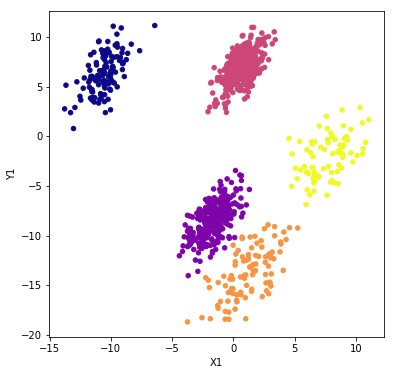

In [33]:
d.plot.scatter(x='X1', y='Y1',
               c=gm.predict(d.loc[:,['X1','Y1']]), 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

 the method works also very smoothly
 why? because the data *is* gaussian

compare the estimated centers

In [34]:
pd.DataFrame(gm.means_)

,0,1
0,-10.535,6.444
1,-1.692,-8.528
2,0.692,6.890
3,1.186,-13.669
4,7.667,-2.039


with the truth (note the clusters may appear in a different order)

In [35]:
pd.DataFrame(mu_k)

,0,1
0,0.688,6.846
1,-1.762,-8.626
2,-10.619,6.280
3,1.197,-13.693
4,7.566,-2.443


or the estimated coefficients

In [36]:
pd.DataFrame(gm.weights_)

,0
0,0.125
1,0.303
2,0.400
3,0.098
4,0.074


 with the truth 

In [37]:
c= Counter(labels)
pd.DataFrame(np.array([c[v] for v in c])/1000.0)

,0
0,0.400
1,0.300
2,0.125
3,0.100
4,0.075
